In [1]:
from tensorflow import keras

imdb=keras.datasets.imdb
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=10000)

In [2]:
word_index=imdb.get_word_index()
word_index={k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [3]:
train_data=keras.preprocessing.sequence.pad_sequences(train_data,value=word_index["<PAD>"],padding='post',maxlen=256)
test_data=keras.preprocessing.sequence.pad_sequences(test_data,value=word_index["<PAD>"],padding='post',maxlen=256)

In [4]:
vocab_size=10000
model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [6]:
print(train_data.shape,test_data.shape)

x_val=train_data[:10000]
partial_x_train=train_data[10000:]
y_val=train_labels[:10000]
partial_y_train=train_labels[10000:]

(25000, 256) (25000, 256)


In [7]:
history=model.fit(partial_x_train,partial_y_train,epochs=25,batch_size=512,validation_data=(x_val,y_val),verbose=1)

Epoch 1/25
30/30 [==============================] - 1s 13ms/step - loss: 0.6921 - accuracy: 0.5249 - val_loss: 0.6907 - val_accuracy: 0.5550
Epoch 2/25
30/30 [==============================] - 0s 10ms/step - loss: 0.6869 - accuracy: 0.6701 - val_loss: 0.6827 - val_accuracy: 0.7233
Epoch 3/25
30/30 [==============================] - 0s 10ms/step - loss: 0.6744 - accuracy: 0.7449 - val_loss: 0.6666 - val_accuracy: 0.7474
Epoch 4/25
30/30 [==============================] - 0s 10ms/step - loss: 0.6514 - accuracy: 0.7719 - val_loss: 0.6401 - val_accuracy: 0.7536
Epoch 5/25
30/30 [==============================] - 0s 10ms/step - loss: 0.6167 - accuracy: 0.7874 - val_loss: 0.6036 - val_accuracy: 0.7878
Epoch 6/25
30/30 [==============================] - 0s 10ms/step - loss: 0.5731 - accuracy: 0.8111 - val_loss: 0.5620 - val_accuracy: 0.8028
Epoch 7/25
30/30 [==============================] - 0s 10ms/step - loss: 0.5254 - accuracy: 0.8291 - val_loss: 0.5182 - val_accuracy: 0.8183
Epoch 8/25
30

In [8]:
loss,accuracy=model.evaluate(test_data,test_labels)
print("Loss:",loss)
print("Accuracy:",accuracy)

782/782 [==============================] - 1s 691us/step - loss: 0.3014 - accuracy: 0.8772
Loss: 0.30135175585746765
Accuracy: 0.8772000074386597


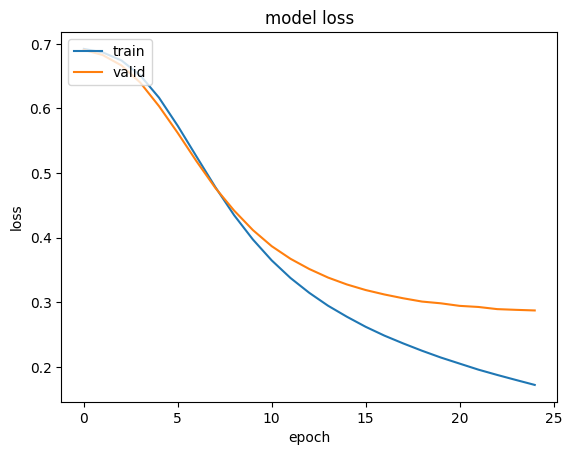

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()